In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging
from utils.merge_tabelas import merge_tabelas

# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager()

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_clientes = db_manager.fetch_data_to_df("SELECT * FROM clientes;")
df_atendentes = db_manager.fetch_data_to_df("SELECT * FROM atendentes;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")
df_lojas = db_manager.fetch_data_to_df("SELECT * FROM lojas;")

df= merge_tabelas(db_manager)

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_clientes.head())
display(df_atendentes.head())
display(df_vendas.head())
display(df_lojas.head())

#tabelas merge

display(df.head(5))

,ID_Produto,Nome_Produto,Categoria,Preço
0,1,rest,Roupas,380.64
1,2,next,Brinquedos,822.26
2,3,discuss,Móveis,220.27
3,4,professor,Alimentos,453.94
4,5,no,Alimentos,887.23


,ID_Cliente,Nome,Idade,Email,Telefone
0,1,Ronald Hamilton,74,jennifer93@hotmail.com,514.274.1458
1,2,David Rios,28,andersonlisa@yahoo.com,555-038-0266
2,3,Gary Bennett,75,amanda62@horn.com,+1-666-391-8179x0940
3,4,Terry Duffy,20,stephanie21@hotmail.com,087.472.1372
4,5,Erica Williams,24,qjohnson@yahoo.com,352.473.5798x132


,ID_Atendente,Nome,Idade,Email,Telefone
0,1,Andrea Parks,30,fhammond@yahoo.com,(854)128-3938x430
1,2,Thomas Meyers,51,rnelson@ferguson.com,399-264-9243x5741
2,3,Nicole Wilson,53,pschwartz@hicks.net,+1-023-051-7629x76733
3,4,Megan Marshall,56,melanie20@meyers-hudson.biz,001-004-133-5648x482
4,5,Gary Stewart,32,jenniferlee@berry.com,+1-235-062-7602x5125


,ID_Venda,ID_Cliente,ID_Produto,ID_Loja,ID_Atendente,Quantidade,Data
0,1,44,28,47,33,5,2020-06-15
1,2,17,4,24,28,3,2024-01-25
2,3,30,46,6,11,10,2021-06-28
3,4,24,38,25,9,7,2020-12-24
4,5,41,30,20,41,1,2024-01-23


,ID_Loja,Nome_Loja,Endereço,Telefone
0,1,"Perez, Phillips and Fitzpatrick","20944 Maurice Summit\nMorenostad, VT 50348",+1-723-083-8020x23905
1,2,Johnson and Sons,"8382 Townsend Park\nWallacetown, UT 48618",810-356-4992x40290
2,3,Murphy Inc,"218 Crosby Summit\nJohnmouth, RI 26384",363-637-9160x148
3,4,Bennett Group,"34823 Patel Cliff\nNorth Andrew, NY 71985",181.111.2769x8119
4,5,Stephens-Henderson,"6640 Vaughan Creek\nPort Coryland, MI 21419",7167931950


,ID Venda,ID Cliente,ID Produto,ID Loja,ID Atendente,Quantidade,Data,Produto,Categoria,Preco,...,Email_x,Telefone_x,Loja,Endereço,Telefone_y,Atendente,Idade_y,Email_y,Telefone,Receita Total
0,1,44,28,47,33,5,2020-06-15,positive,Brinquedos,949.18,...,joshuagonzalez@hotmail.com,538.946.0224,"Robles, Weber and Garcia","5240 Hamilton Dam Suite 475\nLake Christyside,...",+1-482-838-1161,Allison Smith,34,oelliott@yahoo.com,001-210-168-1342,4745.90
1,2,17,4,24,28,3,2024-01-25,professor,Alimentos,453.94,...,emily48@snyder.com,2827070529,Palmer-Hill,USS Hall\nFPO AP 32472,519.716.3345x2679,Angela Willis,48,jruiz@hotmail.com,2543355890,1361.82
2,3,30,46,6,11,10,2021-06-28,easy,Móveis,830.90,...,kingdanielle@martinez.org,0224238587,Curry-Massey,"PSC 2899, Box 9276\nAPO AA 60159",(978)259-1895x865,John Beck,46,emma00@hotmail.com,(146)663-3723,8309.00
3,4,24,38,25,9,7,2020-12-24,fall,Eletrônicos,957.82,...,salazarkelsey@hotmail.com,441-181-1498,"Waller, Sullivan and Boyd","18134 Tiffany Views Suite 165\nRobertburgh, VT...",751-823-3042,Patricia Cox,30,yvette57@gmail.com,908-581-0854x61546,6704.74
4,5,41,30,20,41,1,2024-01-23,already,Eletrônicos,616.41,...,zlee@howard.com,+1-168-763-4516x28750,Miranda Ltd,"46170 Duncan Stream\nWest Andrew, PA 89786",887.115.0729x296,Kathryn Matthews,42,mike45@gmail.com,+1-733-682-7334x205,616.41


In [44]:
#vendas por mes

df["Data"] = pd.to_datetime(df["Data"])
df_vendas_tempo = df.groupby(pd.Grouper(key="Data", freq="M"))["Receita Total"].sum().reset_index()
df_vendas_tempo["Data"] = df_vendas_tempo["Data"].dt.strftime("%Y-%m")
df_vendas_tempo = df_vendas_tempo.sort_values("Data", ascending=False)

display(df_vendas_tempo)

C:\Users\Tuta\AppData\Local\Temp\ipykernel_3472\165732509.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Data,Receita Total
59,2024-12,1808.36
58,2024-11,0.00
57,2024-10,786.24
56,2024-09,8069.22
55,2024-08,1074.88
54,2024-07,2687.20
53,2024-06,3298.24
52,2024-05,0.00
51,2024-04,0.00
50,2024-03,5379.48


0     2024-01
1     2024-02
2     2024-03
3     2024-04
4     2024-05
5     2024-06
6     2024-07
7     2024-08
8     2024-09
9     2024-10
10    2024-11
11    2024-12
Name: Data, dtype: object

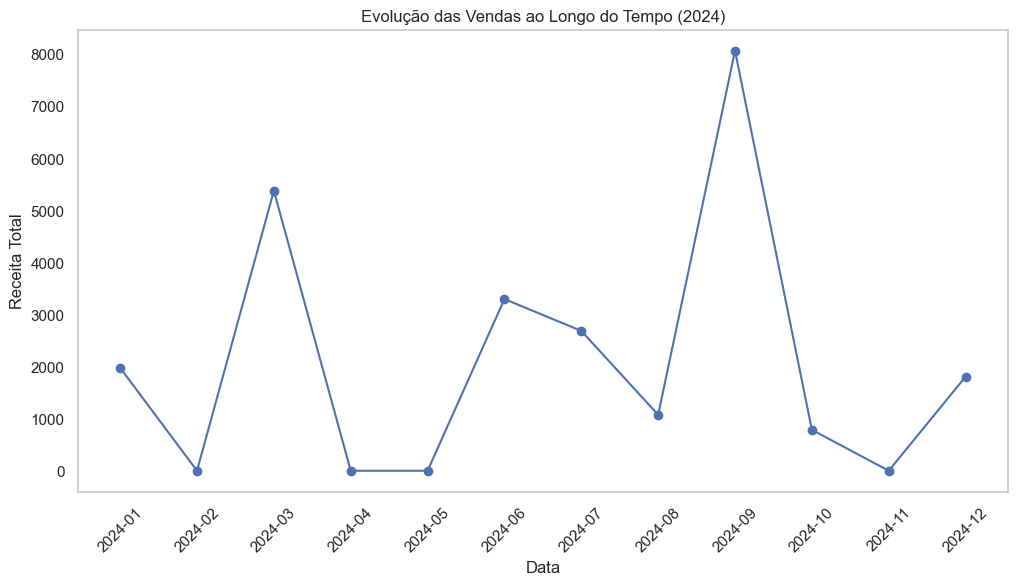

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from utils.merge_tabelas import merge_tabelas
from utils.logger_utils import get_logger
from classes.classanaliselojas import AnaliseLojas 
from classes.classanaliseatendentes import AnaliseAtendentes
from classes.classanalisevendas import AnaliseVendas
from datetime import datetime

# Configurar logger
logger = get_logger("Relatorio Final")

def gerar_relatorio(db_manager):
    """
    Gera um relatório final com os principais indicadores de vendas.
    """
    logger.info("Iniciando geração do relatório consolidado.")

    # Criar pasta para os gráficos
    caminho_graficos = "graficos/relatorio"
    os.makedirs(caminho_graficos, exist_ok=True)

    # Criar instâncias das classes de análise
    analise_lojas = AnaliseLojas(db_manager)
    analise_atendentes = AnaliseAtendentes(db_manager)
    analise_vendas = AnaliseVendas(db_manager)

    # Ticket Médio por Loja e Atendente
    df_ticket_loja = analise_lojas.media_ticket_loja()  # Método já salva CSV
    df_ticket_atendente = analise_atendentes.atendentes_ticket_medio_venda()  # Método já salva CSV

    # Top 10 Produtos Mais Vendidos
    df_top_produtos = analise_vendas.calcular_produtos_mais_vendidos()

    # Faturamento Total por Loja e Atendente
    df_faturamento_loja = analise_lojas.total_faturado_por_loja()
    df_faturamento_atendente = analise_atendentes.atendentes_mais_faturaram()  

    # Evolução das Vendas ao Longo do Tempo ano atual
    df_vendas_tempo = analise_vendas.calcular_total_vendas_mes()
    display(df_vendas_tempo["Data"])
    

    plt.figure(figsize=(12, 6))
    plt.plot(df_vendas_tempo["Data"], df_vendas_tempo["Receita Total"], marker='o', linestyle='-')
    plt.title(f"Evolução das Vendas ao Longo do Tempo ({df_vendas_tempo['Data'].iloc[0][:4]})")  # Ano mais recente no título
    plt.ylabel("Receita Total")
    plt.xlabel("Data")
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()
    plt.close()

    logger.info("Relatório gerado com sucesso.")

if __name__ == "__main__":
    from classes.classdatabasemanager import DatabaseManager
    db_manager = DatabaseManager()
    gerar_relatorio(db_manager)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from utils.merge_tabelas import merge_tabelas
from utils.logger_utils import get_logger
from classes.classanaliselojas import AnaliseLojas 
from classes.classanaliseatendentes import AnaliseAtendentes
from classes.classanalisevendas import AnaliseVendas

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Configurar logger
logger = get_logger("Relatorio Final")

def gerar_relatorio(db_manager):
    """
    Gera um relatório final com os principais indicadores de vendas.
    """
    logger.info("Iniciando geração do relatório consolidado.")

    # Criar pasta para os gráficos
    caminho_graficos = "../graficos/relatorio"
    os.makedirs(caminho_graficos, exist_ok=True)

    # Criar instâncias das classes de análise
    analise_lojas = AnaliseLojas(db_manager)
    analise_atendentes = AnaliseAtendentes(db_manager)
    analise_vendas = AnaliseVendas(db_manager)

    # Ticket Médio por Loja e Atendente
    df_ticket_loja = analise_lojas.media_ticket_loja()
    df_ticket_atendente = analise_atendentes.atendentes_ticket_medio_venda()

    # Top 10 Produtos Mais Vendidos
    df_top_produtos = analise_vendas.calcular_produtos_mais_vendidos()

    # Faturamento Total por Loja e Atendente
    df_faturamento_loja = analise_lojas.total_faturado_por_loja()
    df_faturamento_atendente = analise_atendentes.atendentes_mais_faturaram()

    # Evolução das Vendas ao Longo do Tempo
    df_vendas_tempo = analise_vendas.calcular_total_vendas_mes()
    ano_mais_recente = df_vendas_tempo["Data"].iloc[0][:4]  # Extrai o ano

    # Gráfico de Faturamento por Loja
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=df_faturamento_loja["Loja"], 
                     y=df_faturamento_loja["Receita Total"], 
                     hue=df_faturamento_loja["Loja"],  # Definir hue
                     palette="Blues_r", 
                     legend=False)  # Remover legenda
    plt.xticks(rotation=45)
    plt.title("Faturamento Total por Loja", fontsize=14)
    plt.ylabel("Receita Total")
    plt.xlabel("Loja")
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_graficos, "faturamento_loja.png"))
    plt.close()

    # Gráfico de Top 10 Produtos Mais Vendidos
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=df_top_produtos["Produto"], 
                     y=df_top_produtos["Quantidade"], 
                     hue=df_top_produtos["Produto"],  # Definir hue
                     palette="Greens_r", 
                     legend=False)  # Remover legenda
    plt.xticks(rotation=45)
    plt.title("Top 10 Produtos Mais Vendidos", fontsize=14)
    plt.ylabel("Quantidade Vendida")
    plt.xlabel("Produto")
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_graficos, "top_produtos.png"))
    plt.close()

    # Gráfico Interativo - Evolução das Vendas ao Longo do Tempo
    fig = px.line(df_vendas_tempo, x="Data", y="Receita Total", markers=True,
                  title=f"Evolução das Vendas ao Longo do Tempo ({ano_mais_recente})",
                  labels={"Data": "Mês", "Receita Total": "Receita Total"},
                  template="plotly_white")
    fig.update_xaxes(tickangle=45)
    fig.write_html(os.path.join(caminho_graficos, "evolucao_vendas_interativo.html"))

    logger.info("Relatório gerado com sucesso.")

if __name__ == "__main__":
    from classes.classdatabasemanager import DatabaseManager
    db_manager = DatabaseManager()
    gerar_relatorio(db_manager)